### 데이터 분석 및 시각화

- 분석 데이터 셋 ( 🔗[다운로드 링크](https://drive.google.com/file/d/1RlFzhuB-2u6Ve3iav9qurqVO8abUc00i/view))
    - [유튜브 메인 페이지 “탐색/인기" 섹션](https://support.google.com/youtube/answer/7239739?hl=ko)에서 기초한 데이터셋
    특정 기간동안의 동영상 트렌드 기록/연구 및 데이터를 다양한 관점으로 관찰하고 인사이트를 도출하는데 사용됨.
        - 주어진 데이터셋은 유튜브에서 인기 동영상으로 선택된 비디오 기준으로 가공
        - 하루에 한번씩 수집되었음
        - 각각의 비디오가 인기 동영상에 처음 포착된 시점과 사라진 시점의 데이터가 기록 되어 있음
        
        📝 [분석 데이터 설명](https://www.notion.so/dc71bd0c5b94427bb98b6eaa141ba5b3)
        
- 양식
    - 분석 및 시각화 코드
        - python 3.x
        - 라이브러리 제한은 없지만 pandas는 필수 사용
        - `.py` or `.ipynb`
    - 제출 방식
        - 결과를 도출하기 위해서 작성했던 전체 .py or .ipynb 코드와 모든 결과를 종합하 여 .zip 파일로 제출 (파일명 예시, junior_name_pretest.zip)
- 문제 (해당 과제에 대한 정답은 없습니다)
    - Q1. 데이터 타입별 시각화 (자유양식)
        
        ◦ 전체기간 카테고리->채널->비디오 개수
        
        ◦ 월별 카테고리->채널->비디오 개수
        
        ◦ 월별 TOP10 채널 (분류 기준은 비디오 개수)
        
        ◦ 주별 TOP5 채널 (분류 기준은 비디오 개수)
        
        ◦ 월별 카테고리별 태그 키워드 순위
        
    - Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표 들이 있음
    ex) views, likes, dislikes, comments,...
        - 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고
        - 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.
    - Q3. Q1, Q2의 답을 자유양식으로 작성 후 PDF로 변환하여 첨부
    (영어로 작성 선호하지만 선택 사항임)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/원티드 프리온보딩/Assignment/pretest_data.csv'
df = pd.read_csv(file_path, parse_dates=["published_date", 'on_trending_date', 'off_trending_date'])

### 전체기간 카테고리에서 채널별 비디오 개수

비디오 개수 최소값 : 1
비디오 개수 최대값 : 17
전체 체널 개수 :  940


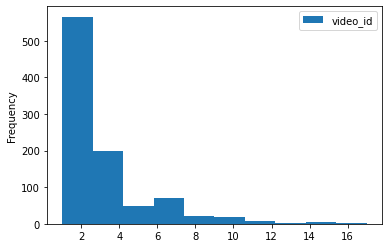

In [3]:
num_by_channel = df[['video_id','channel_id']].groupby(by='channel_id').count().sort_values('channel_id')
num_by_channel.plot.hist(by='channel_id')
min_num = num_by_channel["video_id"].min()
max_num = num_by_channel["video_id"].max()
print("비디오 개수 최소값 :", min_num)
print("비디오 개수 최대값 :", max_num)
print("전체 체널 개수 : ", len(num_by_channel))

### 월별 카테고리 -> 채널별 비디오 개수
월별 카테고리의 경우 인기 동영상에서 처음 포착된 날짜를 기준  
  
: 월별 인기 동영상에 선정된 영상을 각 채널이 얼마나 보유하고 있는지를 
시각화

In [4]:
# 인기 동영상이 처음 포착된 날짜의 최소 최대 범위
print("최소: ", df['on_trending_date'].min())
print("최대: ", df['on_trending_date'].max())

최소:  2021-03-27 00:00:00
최대:  2021-07-31 00:00:00


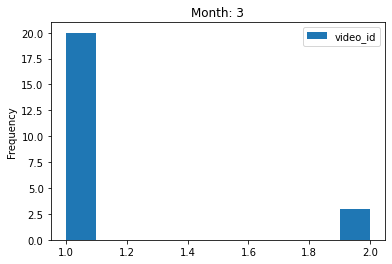

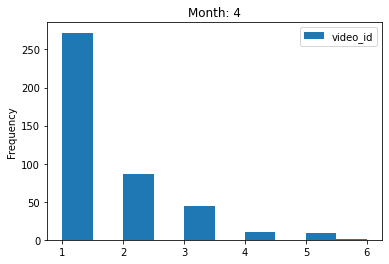

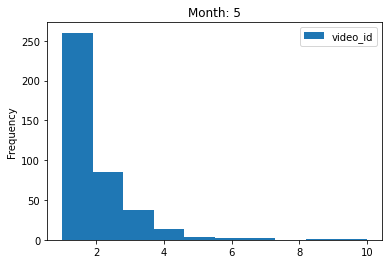

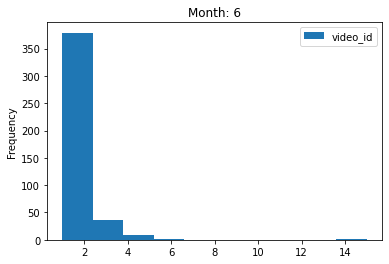

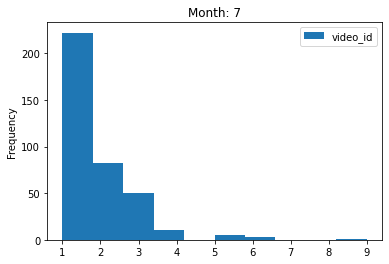

In [5]:
# 3월 부터 7월까지 채널별 인기 동영상 등극 개수
mon = []
for i in range(3, 8):
    monthly = df[df['on_trending_date'].dt.month == i][['video_id','channel_id']].groupby(by='channel_id').count().sort_values('video_id')
    mon.append(monthly.values)
    monthly.plot.hist(by='channel_id',
                      title='Month: '+str(i))

월별 각각의 히스토그램의 범위를 맞추고 한꺼번에 비교하기 위해 하나의 figure에 그림  
일반적으로 1개의 영상이 월별 인기 동영상에 포함된 채널 수가 압도적으로 많아서 보기 쉽지 않으므로,  
동영상 개수를 나타내는 y축을 log scale하여 표현  

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


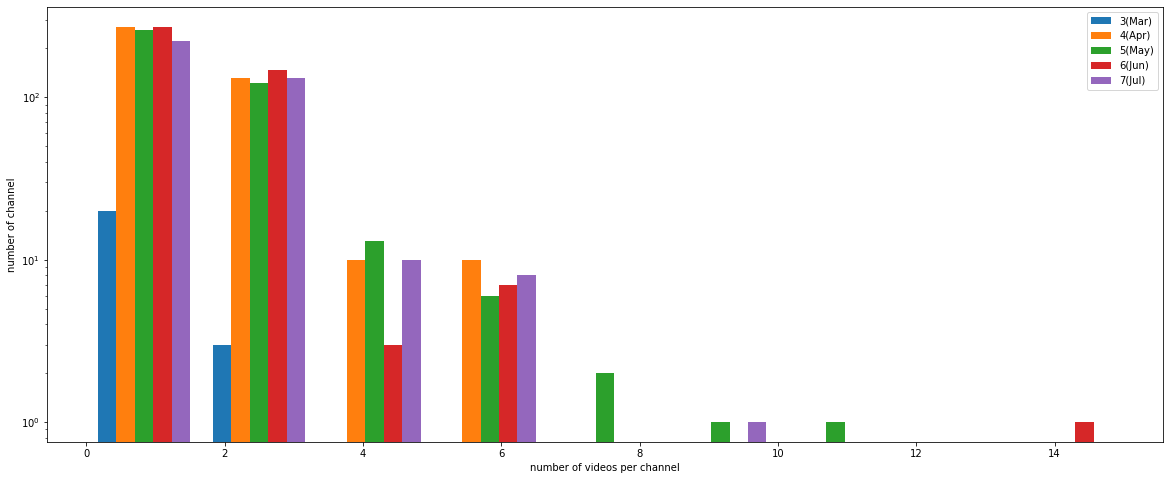

In [6]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 15, 10)

plt.figure(figsize=(20,8))
plt.hist(mon, bins, label=['3(Mar)', '4(Apr)', '5(May)', '6(Jun)', '7(Jul)'])
plt.yscale('log')
plt.xlabel('number of videos per channel')
plt.ylabel('number of channel')
plt.legend(loc='upper right')
plt.show()

### 월별 TOP10 채널 (분류 기준은 비디오 개수)

In [8]:
monthly_top = []
for i in range(3, 8):
    monthly = df[df['on_trending_date'].dt.month == i][['video_id','channel_id']].groupby(by='channel_id').count().sort_values('channel_id')
    monthly = monthly.sort_values(by=['video_id'], ascending=False).head(10)
    monthly_top.append(monthly)
    print(i, "월 TOP10\n", monthly)


3 월 TOP10
             video_id
channel_id          
CHG9aFJ            2
CHnet0I            2
CH5BMQO            2
CH2qVOO            1
CH_U34U            1
CHriPmQ            1
CHqq-ov            1
CHoHirU            1
CHlzB2i            1
CHkh6Tl            1
4 월 TOP10
             video_id
channel_id          
CHmzMtX            6
CHicKQU            5
CHfkXDY            5
CH1L79y            5
CHx6jsZ            5
CHXTyJZ            5
CHUyfkq            5
CHtm_Qo            5
CHLkAep            5
CHeSHil            5
5 월 TOP10
             video_id
channel_id          
CHQ2O-i           10
CHIG4gr            9
CHunsfa            7
CHDV9zg            7
CHsU-I-            6
CH9GtSL            6
CHHBvfB            5
CHExw7_            5
CHPde4g            5
CH3IZKs            5
6 월 TOP10
             video_id
channel_id          
CHtybqq           15
CHpjOmw            6
CHdtRAc            5
CHUyfkq            5
CHtfriF            5
CHaO6TY            5
CHiwQRG            5
CHuDLnJ    

월별 Top10에 다수 포함된 채널을 확인해보려고 했으나 최대 두 번 등극한 채널 2개 이외에는 전부 한 번씩 top10 등극

In [9]:
pd.concat(monthly_top[:]).groupby(by='channel_id').count().sort_values(by=['video_id'], ascending=False).head(5)

,video_id
channel_id,
CHUyfkq,2
CHlzB2i,2
CH1L79y,1
CHfkXDY,1
CHiwQRG,1


### 월별 카테고리 순위

전체 기간 동안 카테고리별 인기 동영상 수

In [10]:
df[['video_id', 'category_name']].groupby(by='category_name').count().sort_values(by=['video_id'], ascending=False)

,video_id
category_name,
Entertainment,954
People & Blogs,411
Music,234
Sports,222
Comedy,167
News & Politics,162
Howto & Style,119
Gaming,80
Film & Animation,74


월별 카테고리별 인기 동영상 에서 Entertainment가 압도적으로 많고, 다음으로 People & Blogs가 상대적으로 많음  
그 다음 순위로는 Music, Sports, Comedy가 주를 이루며 News & Politics와 같은 경우 5월에 갑작스럽게 급상승 한 양상을 보임

In [11]:
for i in range(3, 8):
    monthly = df[df['on_trending_date'].dt.month == i][['video_id', 'category_name']].groupby(by='category_name').count()
    monthly = monthly.sort_values(by=['video_id'], ascending=False).head(5)
    print(i, "월 TOP5\n", monthly)
    print('---------------------')

3 월 TOP5
                  video_id
category_name            
Entertainment           9
News & Politics         5
People & Blogs          4
Sports                  4
Comedy                  1
---------------------
4 월 TOP5
                 video_id
category_name           
Entertainment        254
People & Blogs        94
Comedy                62
Music                 56
Sports                47
---------------------
5 월 TOP5
                  video_id
category_name            
Entertainment         249
People & Blogs        102
Music                  65
News & Politics        59
Comedy                 37
---------------------
6 월 TOP5
                 video_id
category_name           
Entertainment        223
People & Blogs       113
Sports                72
Music                 62
Comedy                34
---------------------
7 월 TOP5
                  video_id
category_name            
Entertainment         219
People & Blogs         98
Sports                 67
Music             

## 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표

- on_rank와 off_rank 지표를 이용해서 인기동영상에 진입한 후, 사라지기 전까지 기록된 순위 변동을 통해 호응도 판단  
(인기 급상승 및 지속적인 인기 정도를 파악해서 호응도 판단 가능)  

- 0보다 큰 값일 경우 인기가 하락하지 않고 상승세를 유지한채로 인기동영상에서 사라짐

In [12]:
rank_df = df[['video_id','channel_id', 'category_name', 'duration', 'on_rank', 'off_rank']]
rank_df['rank_engage'] = df['on_rank'] - df['off_rank'] # 양수(+)일 경우 순위 증가, 음수(-)일 경우 순위 하락

rank_df.sort_values(by=['rank_engage'], ascending=False)[rank_df['rank_engage'] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,video_id,channel_id,category_name,duration,on_rank,off_rank,rank_engage
649,VDwGq,CHhlgI3,News & Politics,PT2M37S,24,13,11
887,VJTwX,CHiBKp3,Entertainment,PT11M6S,32,23,9
6,V-8SN,CHtCiO5,Music,PT20M22S,35,28,7
1574,VaBMQ,CHfU6o0,Comedy,PT59S,8,4,4
1639,VbZAz,CHmCNgL,Comedy,PT12M1S,48,44,4
2519,Vwq6g,CHwx6n_,Entertainment,PT13M10S,25,22,3
202,V3ygF,CHRuSxV,Film & Animation,PT5M18S,47,44,3
1297,VTz52,CH3re3u,Entertainment,PT3M56S,30,27,3
1571,Va7Hf,CHkjXq1,Entertainment,PT12M23S,36,34,2
1445,VXvpL,CHicKQU,People & Blogs,PT16M18S,41,39,2


- on_trending_date와 off_trending_date 지표를 이용해서 인기동영상 목록에 얼마나 오래 머물렀는지를 호응도 지표로 활용 가능

In [13]:
trending_df = df[['video_id','channel_id', 'category_name', 'duration', 'on_trending_date', 'off_trending_date']]
trending_df['trending_duration'] = df['off_trending_date'] - df['on_trending_date'] # 값이 클수록 오래 차트에 오래 머문 영상

trending_df.sort_values(by=['trending_duration'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,video_id,channel_id,category_name,duration,on_trending_date,off_trending_date,trending_duration
1384,VWMwe,CH3IZKs,Music,PT3M3S,2021-05-22,2021-05-29,7 days
603,VCukl,CH3IZKs,Music,PT5M,2021-07-10,2021-07-16,6 days
2487,VwDfq,CHtCiO5,Music,PT18M24S,2021-04-02,2021-04-08,6 days
2176,VoWyW,CHYyLIl,Entertainment,PT12M56S,2021-04-15,2021-04-20,5 days
1572,Va7_J,CHj3_t5,News & Politics,PT2M15S,2021-05-13,2021-05-18,5 days
...,...,...,...,...,...,...,...
1408,VX-hR,CHVyMrl,People & Blogs,PT13M7S,2021-06-21,2021-06-21,0 days
1407,VWxoW,CHLJNGm,People & Blogs,PT12M3S,2021-05-03,2021-05-03,0 days
1406,VWxVC,CH920m3,Entertainment,PT2M40S,2021-07-24,2021-07-24,0 days
1403,VWo7X,CHgBLs7,Comedy,PT8M2S,2021-05-09,2021-05-09,0 days


In [14]:
trending_df.sort_values(by=['trending_duration'], ascending=False)[trending_df['trending_duration'] > "0 days"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,video_id,channel_id,category_name,duration,on_trending_date,off_trending_date,trending_duration
1384,VWMwe,CH3IZKs,Music,PT3M3S,2021-05-22,2021-05-29,7 days
603,VCukl,CH3IZKs,Music,PT5M,2021-07-10,2021-07-16,6 days
2487,VwDfq,CHtCiO5,Music,PT18M24S,2021-04-02,2021-04-08,6 days
2176,VoWyW,CHYyLIl,Entertainment,PT12M56S,2021-04-15,2021-04-20,5 days
1572,Va7_J,CHj3_t5,News & Politics,PT2M15S,2021-05-13,2021-05-18,5 days
...,...,...,...,...,...,...,...
1248,VSa7u,CHbD8Ep,Entertainment,PT4M31S,2021-04-10,2021-04-11,1 days
1250,VScF8,CH8WoHU,Entertainment,PT8M18S,2021-05-19,2021-05-20,1 days
521,VBBQB,CHuTKrQ,Entertainment,PT3M26S,2021-07-01,2021-07-02,1 days
542,VBZes,CHtm_Qo,Sports,PT11M47S,2021-04-16,2021-04-17,1 days


- off_likes와 off_dislikes 지표를 활용해 인기동영상에서 사라지기 전 좋아요 수 대비 싫어요 수를 통해 호응도 측정 가능  
(싫어요에 비해 좋아요가 얼마나 많은지를 통해, 다수의 사람들이 일반적으로 영상에 대해 호의적인지 판단 가능)  
- 추가적으로 영상이 좋은 의미로 이슈가 된 것인지 나쁜 의도로 이슈가 된 것인지를 판별 가능

In [15]:
likes_df = df[['video_id','channel_id', 'category_name', 'duration', 'off_likes', 'off_dislikes']]
likes_df['likes_rate'] = df['off_likes'] / df['off_dislikes'] # 0보다 크면 호의적, 0보다 작으면 냉소적 / 값이 클 수록 그 정도가 큼

likes_df.sort_values(by=['likes_rate'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,video_id,channel_id,category_name,duration,off_likes,off_dislikes,likes_rate
1027,VMs2b,CHfkXDY,Music,PT6M36S,172240,119,1447.394958
78,V1-2c,CHppou5,People & Blogs,PT1M29S,136915,107,1279.579439
653,VE56u,CHzCedB,Music,PT38S,186484,151,1234.993377
1677,VcVv4,CHcTWmz,Entertainment,PT10M59S,17289,14,1234.928571
501,VAluv,CHzCedB,Music,PT8M11S,151163,125,1209.304000
...,...,...,...,...,...,...,...
1662,Vbu70,CHvAewW,Entertainment,PT8M55S,0,0,NaN
1855,VhAxq,CHdq61m,Film & Animation,PT40S,0,0,NaN
2022,Vl9G_,CHbCr1d,Entertainment,PT11M46S,0,0,NaN
2205,VpWmD,CHvAewW,Entertainment,PT8M12S,0,0,NaN
